In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [52]:
from ucimlrepo import fetch_ucirepo
#fetch dataset 
ozone_level_detection = fetch_ucirepo(id = 172)

#data (as pandas dataframes)

X = ozone_level_detection.data.features
y = ozone_level_detection.data.targets 


In [2]:
#metadata 
print(ozone_level_detection.metadata)


#variable information
print(ozone_level_detection.variables)

{'uci_id': 172, 'name': 'Ozone Level Detection', 'repository_url': 'https://archive.ics.uci.edu/dataset/172/ozone+level+detection', 'data_url': 'https://archive.ics.uci.edu/static/public/172/data.csv', 'abstract': 'Two ground ozone level data sets are included in this collection. One is the eight hour peak set (eighthr.data), the other is the one hour peak set (onehr.data). Those data were collected from 1998 to 2004 at the Houston, Galveston and Brazoria area.', 'area': 'Climate and Environment', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 2536, 'num_features': 72, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Dataset', 'Date'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5NG6W', 'creators': ['Kun Zhang', 'Wei Fan', 'XiaoJing Yuan'], 'intro_paper': None, 'additional_i

In [7]:
X.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,-15.5,0.15,10.67,-1.56,5795.0,-12.10,17.9,10330.0,-55.0,0.00
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,-14.5,0.48,8.39,3.84,5805.0,14.05,29.0,10275.0,-55.0,0.00
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,-15.9,0.60,6.94,9.80,5790.0,17.90,41.3,10235.0,-40.0,0.00
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,-16.8,0.49,8.73,10.54,5775.0,31.15,51.7,10195.0,-40.0,2.08
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58


In [8]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [9]:
y.nunique()

Class    2
dtype: int64

In [18]:
X.dtypes.value_counts()

float64    72
Name: count, dtype: int64

In [20]:
y.dtypes.value_counts()

int64    1
Name: count, dtype: int64

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WSR0    4472 non-null   float64
 1   WSR1    4486 non-null   float64
 2   WSR2    4482 non-null   float64
 3   WSR3    4486 non-null   float64
 4   WSR4    4484 non-null   float64
 5   WSR5    4486 non-null   float64
 6   WSR6    4488 non-null   float64
 7   WSR7    4492 non-null   float64
 8   WSR8    4490 non-null   float64
 9   WSR9    4496 non-null   float64
 10  WSR10   4494 non-null   float64
 11  WSR11   4486 non-null   float64
 12  WSR12   4496 non-null   float64
 13  WSR13   4494 non-null   float64
 14  WSR14   4494 non-null   float64
 15  WSR15   4498 non-null   float64
 16  WSR16   4502 non-null   float64
 17  WSR17   4504 non-null   float64
 18  WSR18   4498 non-null   float64
 19  WSR19   4486 non-null   float64
 20  WSR20   4482 non-null   float64
 21  WSR21   4484 non-null   float64
 22  

In [29]:
describe_df = X.describe()
describe_df


,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp
count,4472.000000,4486.000000,4482.000000,4486.000000,4484.000000,4486.000000,4488.000000,4492.000000,4490.000000,4496.000000,...,4840.000000,4820.000000,4650.000000,4650.000000,4846.000000,4798.000000,4820.000000,4880.000000,4753.000000,5066.000000
mean,1.640720,1.586893,1.546095,1.526839,1.522859,1.542666,1.638057,2.047729,2.539755,2.848154,...,-10.509835,0.304693,9.869865,0.831004,5818.859884,10.510932,37.388351,10164.189549,-0.125184,0.371879
std,1.272062,1.266691,1.239792,1.205410,1.198729,1.172087,1.161482,1.160495,1.185480,1.221136,...,3.882005,0.249043,9.528994,7.353208,79.180759,20.711815,11.227214,52.410377,35.823056,1.317589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,...,-24.800000,0.010000,-14.920000,-25.990000,5480.000000,-56.700000,-10.100000,9975.000000,-135.000000,0.000000
25%,0.600000,0.600000,0.600000,0.600000,0.600000,0.700000,0.800000,1.200000,1.700000,2.000000,...,-13.325000,0.090000,2.460000,-3.790000,5770.000000,-3.575000,32.287500,10130.000000,-20.000000,0.000000
50%,1.300000,1.300000,1.200000,1.300000,1.300000,1.300000,1.400000,1.900000,2.500000,2.800000,...,-10.100000,0.230000,9.230000,0.360000,5835.000000,14.900000,41.100000,10160.000000,0.000000,0.000000
75%,2.400000,2.300000,2.200000,2.200000,2.200000,2.100000,2.200000,2.800000,3.300000,3.700000,...,-7.300000,0.470000,16.710000,4.882500,5880.000000,28.350000,45.100000,10195.000000,15.000000,0.050000
max,7.500000,7.700000,7.100000,7.300000,7.200000,7.400000,7.400000,7.500000,9.200000,8.500000,...,-1.700000,1.000000,42.360000,30.420000,5965.000000,42.050000,59.150000,10350.000000,140.000000,20.650000


In [36]:
describe_df.T

,count,mean,std,min,25%,50%,75%,max
WSR0,4472.0,1.640720,1.272062,0.0,0.6000,1.3,2.40,7.50
WSR1,4486.0,1.586893,1.266691,0.0,0.6000,1.3,2.30,7.70
WSR2,4482.0,1.546095,1.239792,0.0,0.6000,1.2,2.20,7.10
WSR3,4486.0,1.526839,1.205410,0.0,0.6000,1.3,2.20,7.30
WSR4,4484.0,1.522859,1.198729,0.0,0.6000,1.3,2.20,7.20
...,...,...,...,...,...,...,...,...
KI,4798.0,10.510932,20.711815,-56.7,-3.5750,14.9,28.35,42.05
TT,4820.0,37.388351,11.227214,-10.1,32.2875,41.1,45.10,59.15
SLP,4880.0,10164.189549,52.410377,9975.0,10130.0000,10160.0,10195.00,10350.00
SLP_,4753.0,-0.125184,35.823056,-135.0,-20.0000,0.0,15.00,140.00


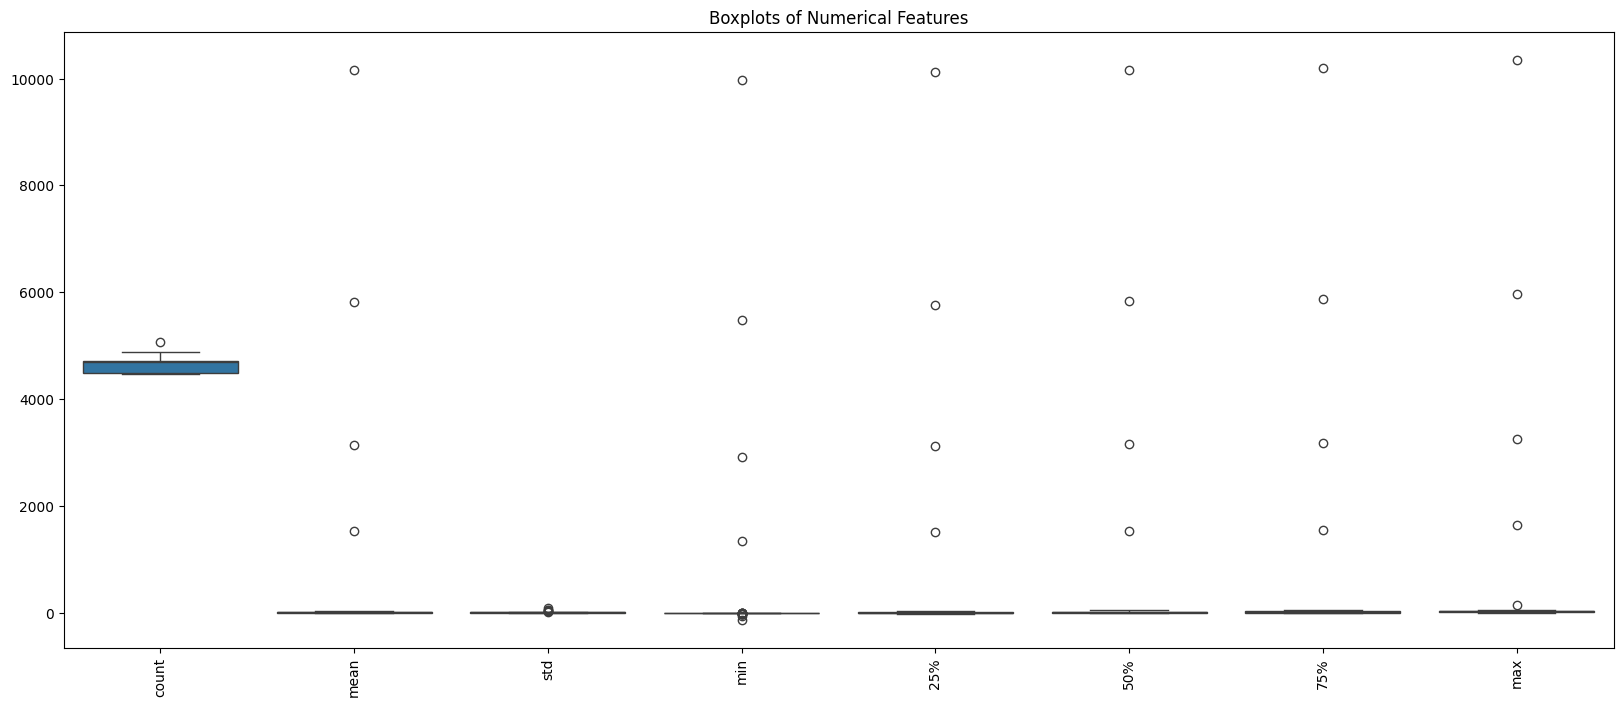

In [33]:
plt.figure(figsize=(20,8))
sns.boxplot(data = describe_df.T)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("Boxplots of Numerical Features")
plt.show()

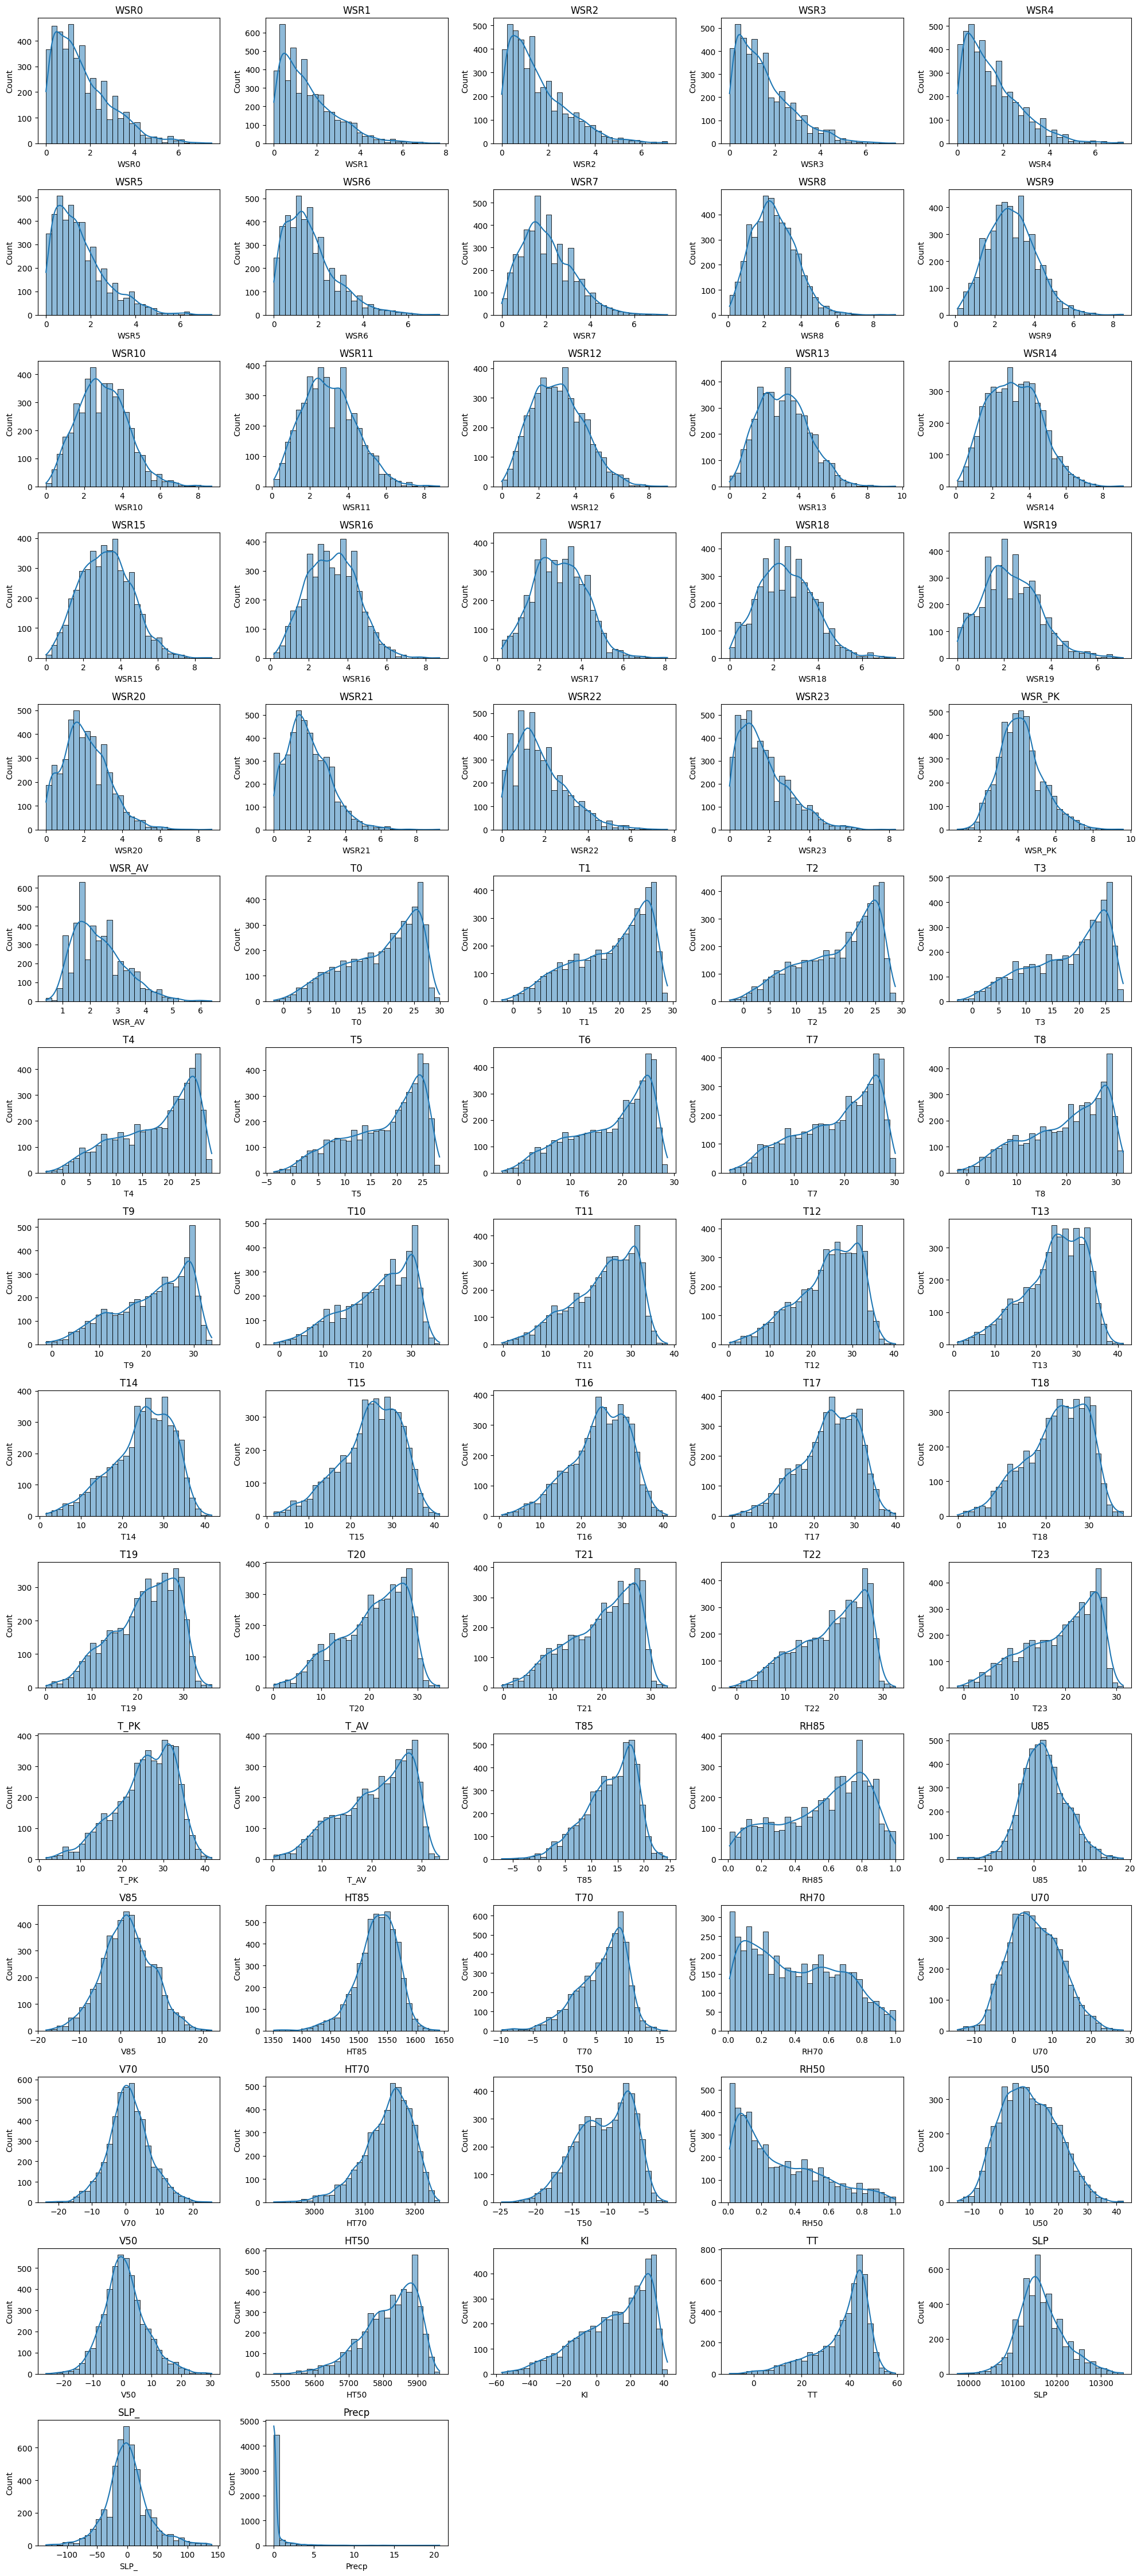

In [42]:
num_features = X.shape[1]  # Total number of columns
cols_per_row = 5  # Number of histograms per row
rows = (num_features // cols_per_row) + 1  # Calculate rows needed

fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, rows * 3))  # Adjust height dynamically

axes = axes.flatten()  # Flatten for easier iteration

for i, col in enumerate(X.columns):
    sns.histplot(X[col], bins=30, kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(col)
    
# Hide any unused subplots (in case cols_per_row * rows > num_features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [53]:
X.isnull().sum().describe()

count     72.000000
mean     414.930556
std      141.096444
min        4.000000
25%      357.500000
50%      377.000000
75%      574.500000
max      600.000000
dtype: float64

In [43]:
#Calculating the null values percentage
(X.isnull().sum().sum() / X.size) * 100

8.184034626342317

Since null values account for around 8% of the total entries in the dataset. I will proceed with imputing them with the mean value as all the 72 independent features are of numerical nature.

In [56]:
#Imputing null values with mean 
#Since null values in a feature might be related to another independent feature. I will use KNN imputer for imputation task 
imputer = KNNImputer(n_neighbors=5)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [54]:
X_imputed.shape, X.shape
X.isnull().sum().sum(), X_imputed.isnull().sum().sum()

(29875, 0)

In [5]:
y.sample(n = 10)

,Class
1879,1
4879,0
3481,0
888,0
226,0
3024,0
844,0
3966,0
4477,0
4591,0


In [18]:
y.nunique()

Class    2
dtype: int64

In [19]:
y.value_counts()

Class
0        4837
1         233
Name: count, dtype: int64